In [38]:
import numpy as np
import pandas as pd
from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns

In [2]:
""" Plots a stacked bar chart with the data and labels provided.
    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list containing data for each series in rows
    series_labels   -- list of series labels (these appear in the legend)
    category_labels -- list of category labels (these appear on the x-axis)
    show_values     -- If True then numeric value labels will  be shown on each bar
    value_format    -- Format string for numeric value labels (default is "{}")
    y_label         -- Label for y-axis (str)
"""
def stacked_bar(data, standarderrors, series_labels, 
                category_labels=None, 
                show_values=False, 
                value_format="{}", y_label=None,
                cols = ['royalblue', 'lightsteelblue'], 
                alpha = [1, .3], 
                barPositionsOnXAxis = [0,.75,2,2.75]):
    ny = len(data[0])
    width = .5
    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(barPositionsOnXAxis, row_data, width, bottom=cum_size, 
                            label=series_labels[i], color = cols[i], alpha = alpha[i], yerr=standarderrors[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(barPositionsOnXAxis, category_labels, fontsize = 12)

    if y_label:
        plt.ylabel(y_label)

    if show_values:
        for axis in axes:
            
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                vSpace = max(h/2, .05)
                plt.text(bar.get_x() + w/2, bar.get_y() + vSpace, 
                         value_format.format(h), ha="center", 
                         va="center", fontsize = 10)

## Parameters from Simulation

In [3]:
#two token, inversion, wall, one Ax
modelMeans = (0.000011, 0.410811,0.137745,0.325778)
modelMeansGoTo = (0.999987, 0.354583,0.734317,0.428031)
targetMeans = (0.0, .56, .23, .375)
targetMeansGoTo = (1.0, .42, .77, .625)
targetSEs = (0.0, .1,.08, .1)
targetSEsGoTo = (0.0, .1, .08, .1)

In [4]:
#experiment 1 target human performances from paper
targetMeansExp1 = {'twoToken':0.02, 'inversion':.91, 'wall':.48, 'oneAx':.32}
targetSEExp1 = {'twoToken':0.025, 'inversion':.042, 'wall':.073, 'oneAx':.082}

#experiment 2 target human performances from paper
targetMeansExp2 = {'twoToken':0.0, 'twoToken_goto':1.0,'inversion':.56,'inversion_goto':.42, 'wall':.23,'wall_goto':.77, 'oneAx':.375, 'oneAx_goto':.625}
targetSEExp2 = {'twoToken':0.0, 'twoToken_goto':0.0,'inversion':.1,'inversion_goto':.1, 'wall':.08,'wall_goto':.08, 'oneAx':.1, 'oneAx_goto':.1}

# Unified Model predictions (null Signaling allowed)

In [61]:
def autolabel(rects):        
    for bar in rects:
        w, h = bar.get_width(), bar.get_height()
        vSpace = max(h/2, .05)
        plt.text(bar.get_x() + w/2, bar.get_y() + vSpace, 
                 "{}".format(round(h, 3)), ha="center", 
                 va="center", fontsize = 30, color = 'grey')

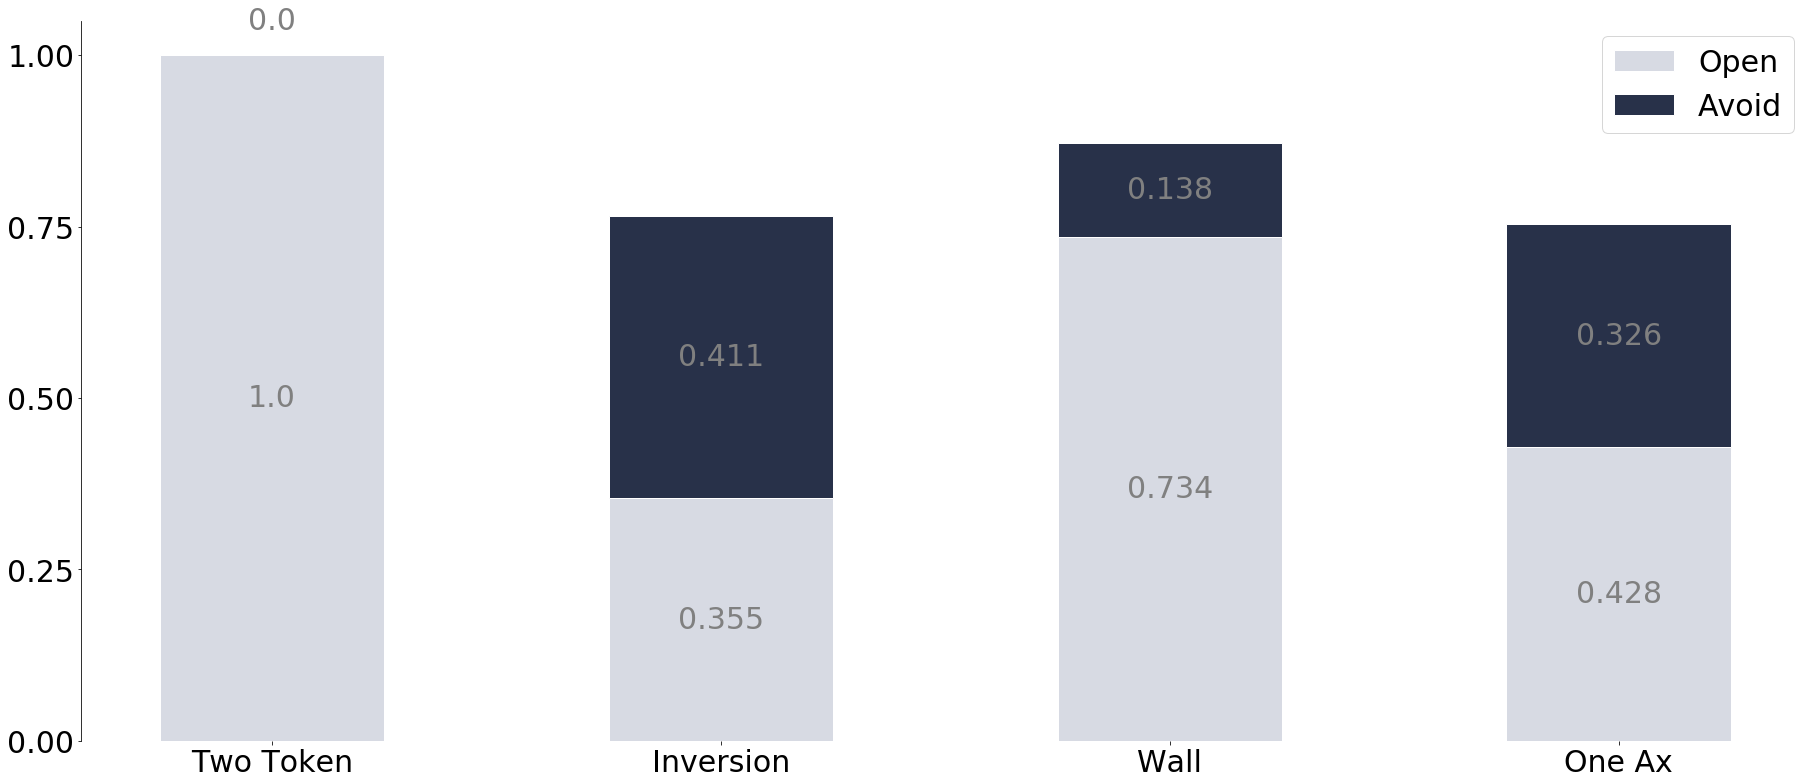

In [64]:
save=False
fSize = (24, 10)
filename = "MisyakHumanResults.png"

fig = plt.figure(figsize =fSize)
ax = fig.add_axes([0,0,1,1])
width=.5

modelNames = ['Two Token', 'Inversion','Wall', 'One Ax']
goToProp = modelMeansGoTo
avoidProp = modelMeans
me_rec = (0,0,0,0)
me_sig = (0,0,0,0)


p1 = plt.bar(modelNames, goToProp, width, yerr = me_rec, label = 'Open', color = '#d7dae3',edgecolor='white')
p2 = plt.bar(modelNames, avoidProp, width,yerr = me_sig, label = 'Avoid', color = '#283149', edgecolor='white',bottom=goToProp)

ax.set_yticks([0,.25,.5,.75,1])
ax.set_xticklabels(modelNames, size=40)
ax.tick_params(labelsize=30)
plt.legend(loc='best',  prop={'size': 30})
sns.despine(bottom=True)

autolabel(p1)
autolabel(p2)

if save:
    fig.savefig(filename,dpi=300, bbox_inches='tight')
plt.show()

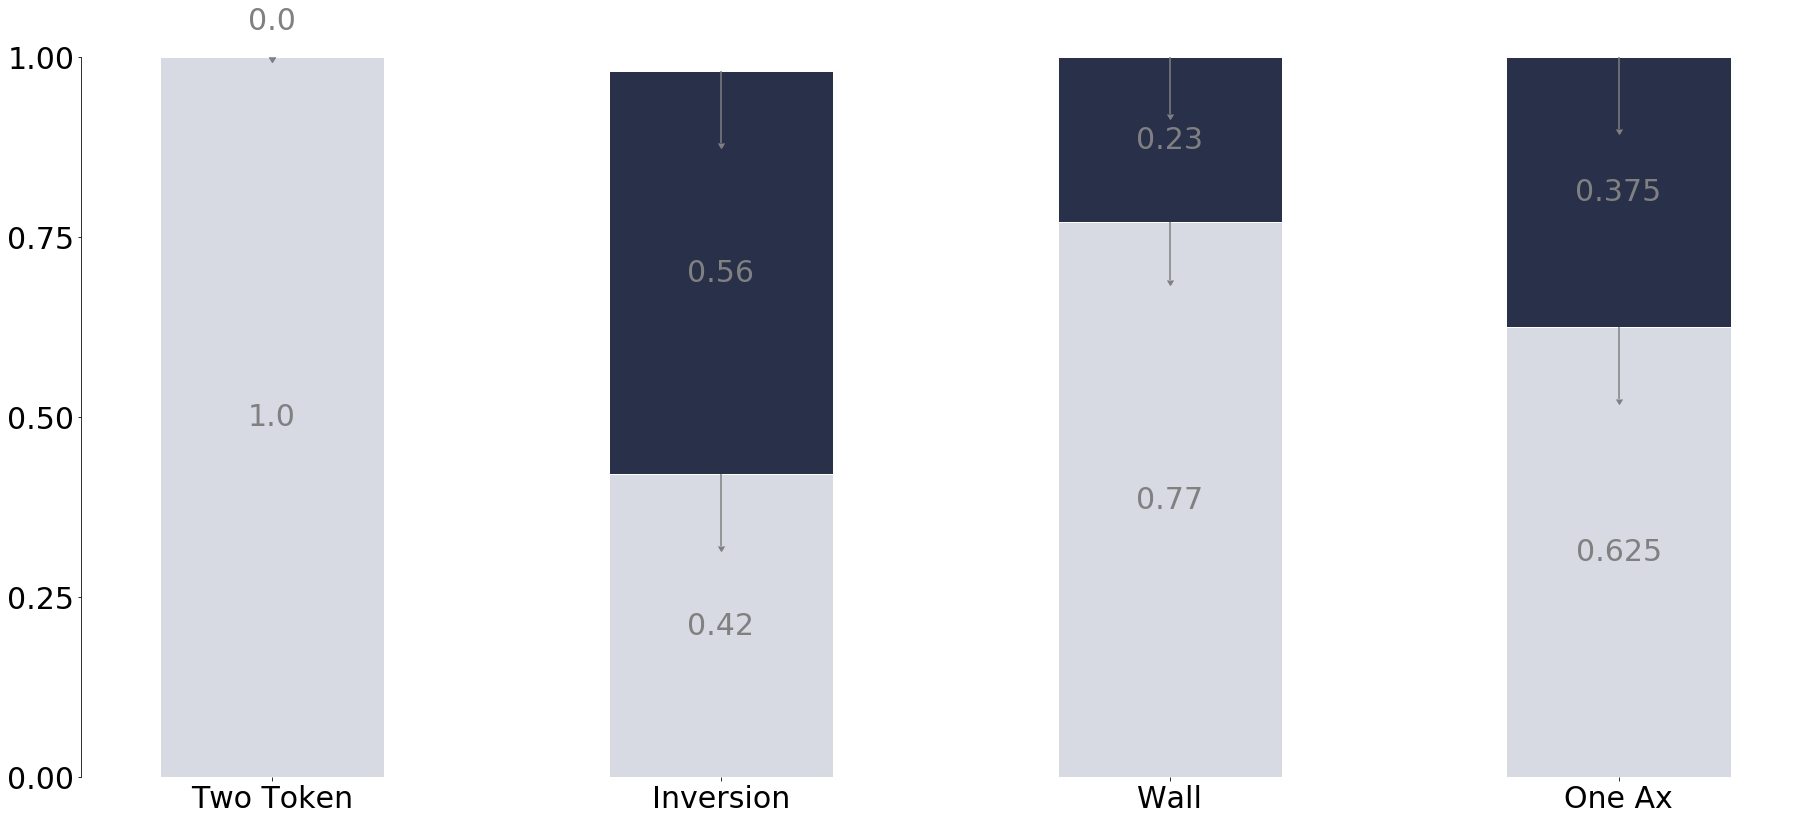

In [65]:
targetMeans = (0.0, .56, .23, .375)
targetMeansGoTo = (1.0, .42, .77, .625)
targetSEs = (0.0, .1,.08, .1)
targetSEsGoTo = (0.0, .1, .08, .1)

save=False
fSize = (24, 10)
filename = "MisyakModelResults.png"

fig = plt.figure(figsize =fSize)
ax = fig.add_axes([0,0,1,1])
width=.5

modelNames = ['Two Token', 'Inversion','Wall', 'One Ax']
goToProp = targetMeansGoTo
avoidProp = targetMeans
totalY = [a+b for a, b in zip(targetMeansGoTo, targetMeans)]
me_rec = targetSEsGoTo
me_sig = targetSEs


p1 = plt.bar(modelNames, goToProp, width, label = 'Open', color = '#d7dae3',edgecolor='white')
p2 = plt.bar(modelNames, avoidProp, width, label = 'Avoid', color = '#283149', edgecolor='white',bottom=goToProp)

ax.errorbar(modelNames, goToProp,yerr=me_rec, uplims=1, linestyle = "None", color = 'grey')
ax.errorbar(modelNames, totalY,yerr=me_sig, uplims=1, linestyle = "None", color='grey')


autolabel(p1)
autolabel(p2)

ax.set_yticks([0,.25,.5,.75,1])
ax.set_xticklabels(modelNames, size=30)
ax.tick_params(labelsize=30)
#plt.legend(loc='best',  prop={'size': 30})
sns.despine(bottom=True)
if save:
    fig.savefig(filename,dpi=300, bbox_inches='tight')
plt.show()

# Inversion and Two Token Conditions 
With null signaling, tuned on alpha = 4, signal type prior = .57 'go to', utility of reward  = +5, no costs

<Figure size 3456x1728 with 0 Axes>

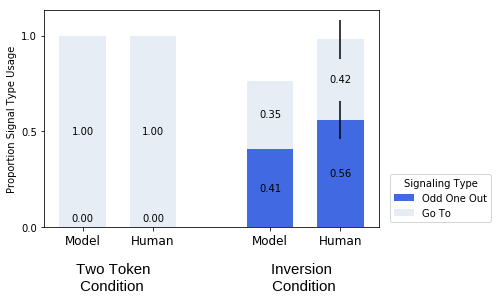

In [5]:
plt.figure(figsize=(48, 24))
fig, ax = plt.subplots() 

#fig.suptitle("Signaling Type Usage",fontsize = 20, fontname = 'Liberation Sans')

series_labels = ['Odd One Out', 'Go To']

# Data Format
# Odd one Out: [(model two token, human two token, model inversion, human inversion)
# Go To: (model two token, human two token, model inversion, human inversion)]

data = [
    (0.000011, 0,0.410811, .56),
    (0.999987, 1, 0.354583, .42)]

SEs = [
    (0.0, 0,0.0, .1),
    (0.0, 0, 0.0, .1)]

category_labels = ['Model', 'Human','Model', 'Human']

stacked_bar(
    data, SEs,
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.2f}", y_label='Proportion Signal Type Usage'
)
ax.legend(loc='lower right', bbox_to_anchor=(1.35, .0), fancybox=True, title = 'Signaling Type')
ax.set_yticks([0,.5,1])
fig.text(.2, -.05, 'Two Token \n Condition', ha='left', va = 'center', fontsize=15, fontname = 'Liberation Sans')
fig.text(.8, -.05, 'Inversion \n Condition', ha='right', va = 'center', fontsize=15,fontname = 'Liberation Sans')

plt.savefig('misyak1_nullSignaling.png', dpi = 800)
plt.show()

# Wall and One Ax Conditions
With null signaling, tuned on alpha = 4, signal type prior = .57 'go to', utility of reward  = +5, no costs

<Figure size 3456x1728 with 0 Axes>

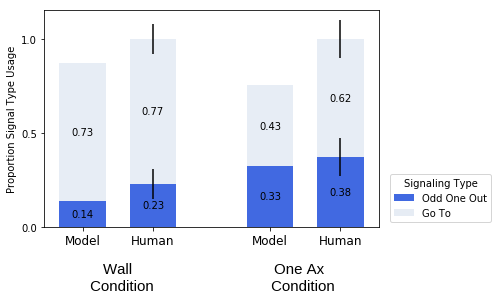

In [6]:
plt.figure(figsize=(48, 24))
fig, ax = plt.subplots() 

#fig.suptitle("Signaling Type Usage",fontsize = 20, fontname = 'Liberation Sans')

series_labels = ['Odd One Out', 'Go To']

# Data Format
# Odd one Out: [(model two token, human two token, model inversion, human inversion)
# Go To: (model two token, human two token, model inversion, human inversion)]

data = [
    (0.137745, .23,0.325778, .375),
    (0.734317, .77,0.428031, .625)]

SEs = [
    (0.0, 0.08,0.0, .1),
    (0.0, 0.08, 0.0, .1)]

category_labels = ['Model', 'Human','Model', 'Human']

stacked_bar(
    data, SEs,
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.2f}", y_label='Proportion Signal Type Usage'
)
ax.legend(loc='lower right', bbox_to_anchor=(1.35, .0), fancybox=True, title = 'Signaling Type')
ax.set_yticks([0,.5,1])
fig.text(.3, -.05, 'Wall \n Condition', ha='center', va = 'center', fontsize=15, fontname = 'Liberation Sans')
fig.text(.72, -.05, 'One Ax \n Condition', ha='center', va = 'center', fontsize=15,fontname = 'Liberation Sans')

plt.savefig('misyak2_nullSignaling.png', dpi=800)
plt.show()

# Two Token and Inversion Signals
No Null Signal, Tuned on alpha = 1.75, signal category prior = .6, utility of reward  = +5, no costs

<Figure size 1728x864 with 0 Axes>

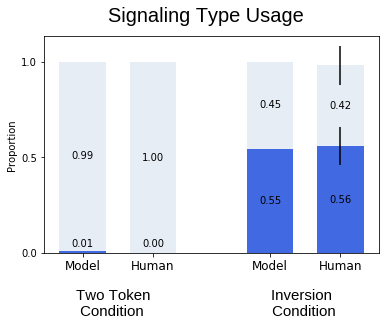

In [7]:
plt.figure(figsize=(24, 12))
fig, ax = plt.subplots() 

fig.suptitle("Signaling Type Usage",fontsize = 20, fontname = 'Liberation Sans')

series_labels = ['Odd One Out', 'Go To']

# Data Format
# Odd one Out: [(model two token, human two token, model inversion, human inversion)
# Go To: (model two token, human two token, model inversion, human inversion)]

data = [
    (0.012393, 0, 0.545338, .56),
    (0.987295, 1, 0.454662, .42)]

SEs = [
    (0.0, 0,0.0, .1),
    (0.0, 0, 0.0, .1)]

category_labels = ['Model', 'Human','Model', 'Human']

stacked_bar(
    data, SEs,
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.2f}", y_label='Proportion'
)
#ax.legend(loc='lower right', bbox_to_anchor=(1.35, .0), fancybox=True, title = 'Signaling Type')
ax.set_yticks([0,.5,1])
fig.text(.2, -.05, 'Two Token \n Condition', ha='left', va = 'center', fontsize=15, fontname = 'Liberation Sans')
fig.text(.8, -.05, 'Inversion \n Condition', ha='right', va = 'center', fontsize=15,fontname = 'Liberation Sans')

plt.show()

# Wall and One Ax Conditions
No null signaling, tuned on alpha = 1.75, signal type prior = .6 'go to', utility of reward  = +5, no costs

<Figure size 2592x1440 with 0 Axes>

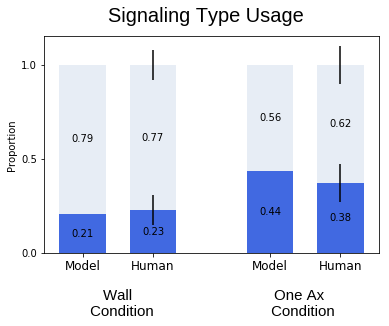

In [8]:
plt.figure(figsize=(36, 20))
fig, ax = plt.subplots() 

fig.suptitle("Signaling Type Usage",fontsize = 20, fontname = 'Liberation Sans')

series_labels = ['Odd One Out', 'Go To']

# Data Format
# Odd one Out: [(model wall, human wall, model one ax, human one ax)
# Go To: (model wall, human wall, model one ax, human one ax)]

data = [
    (0.211127, .23, 0.436434, .375),
    (0.788873, .77,0.563566, .625)]

SEs = [
    (0.0, 0.08,0.0, .1),
    (0.0, 0.08, 0.0, .1)]

category_labels = ['Model', 'Human','Model', 'Human']

stacked_bar(
    data, SEs,
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.2f}", y_label='Proportion'
)
#ax.legend(loc='lower right', bbox_to_anchor=(1.35, .0), fancybox=True, title = 'Signaling Type')
ax.set_yticks([0,.5,1])
fig.text(.3, -.05, 'Wall \n Condition', ha='center', va = 'center', fontsize=15, fontname = 'Liberation Sans')
fig.text(.72, -.05, 'One Ax \n Condition', ha='center', va = 'center', fontsize=15,fontname = 'Liberation Sans')

plt.show()

# Grosse Plots

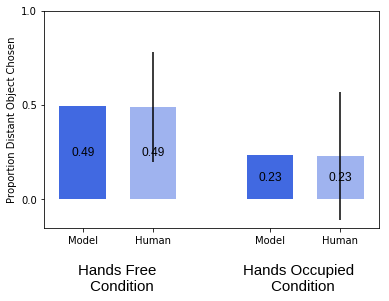

In [7]:
bar_width = 0.5
opacity = 0.8
barPositionsOnXAxis = [0,2]
humanBarPositions = [.75, 2.75]

# data to plot


n_groups = 4
modelMeans = (0.494937, 0.233614)
humanMeans = (.49, .23)
ses = (.29, .34)
col = ['royalblue']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)

modelResults = plt.bar(barPositionsOnXAxis, modelMeans, bar_width,alpha=1,color=col)
humanResults = plt.bar(humanBarPositions, humanMeans, bar_width, alpha=.5, color=col, yerr=ses)

#fig.suptitle("Proportion of Receiver Choosing Distant Object",fontsize = 20, fontname = 'Liberation Sans')

ax.set_yticks([0,.5,1])
plt.xticks([0,.75,2,2.75], ('Model', 'Human', 'Model', 'Human'))
plt.ylabel("Proportion Distant Object Chosen")
fig.text(.3, -.05, 'Hands Free \n Condition', ha='center', va = 'center', fontsize=15, fontname = 'Liberation Sans')
fig.text(.72, -.05, 'Hands Occupied \n Condition', ha='center', va = 'center', fontsize=15,fontname = 'Liberation Sans')

xs = [0.,.75,2,2.75]
ys = [0.494937/2, .49/2, 0.233614/2, .23/2]
tx = ['0.49', '0.49', '0.23', '0.23']
for i in range(4):
    plt.text(xs[i], ys[i],tx[i], ha="center", va="center", fontsize = 12, fontname = 'Liberation Sans')

plt.savefig('grosse.png', dpi=800)
plt.show()